(array([[0.12033585, 0.18255333, 0.34129634],
       [0.49848127, 0.30295029, 0.64167561],
       [0.87167912, 0.52728472, 0.24117612]]), array([[0.96464771, 0.48594795, 0.02242562]]))
Epoch 0  :  [[0.70987156 0.6942     0.69623458 0.73969842]]
Epoch 1  :  [[0.54572498 0.53812907 0.52998103 0.53205999]]
Epoch 2  :  [[0.50093455 0.49854243 0.48762024 0.47641568]]
Epoch 3  :  [[0.48795605 0.49085507 0.47910075 0.46215177]]
Epoch 4  :  [[0.48232502 0.49094317 0.47868472 0.45716324]]


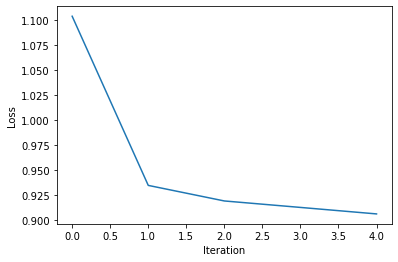

(array([[ 0.07732693,  0.1353973 , -0.19617539],
       [ 0.47769298,  0.28287079,  0.59045746],
       [ 0.8300053 ,  0.47573786,  0.41795186]]), array([[ 0.63284298, -0.18807359, -0.41740174]]))
output :  [0.49328352 0.4804873  0.45399166]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, input_nodes, n_hidden_nodes, n_y_nodes):
        self.w1 = np.random.rand(n_hidden_nodes, input_nodes)
        self.w2 = np.random.rand(n_y_nodes, n_hidden_nodes)
        self.b1 = np.random.rand(n_hidden_nodes)
        self.b2 = np.random.rand(n_y_nodes)

    def get_weights(self):
        return (self.w1,self.w2)

    def sigmoid(self, z):
        z = 1/(1+np.exp(-z))
        return z

    def forward_prop(self, x):
        h = np.dot(self.w1, x)
        hout = self.sigmoid(h)
        y = np.dot(self.w2, hout)
        yout = self.sigmoid(y)
        return h,hout,y,yout

    def back_prop(self, m, h, hout, y, yout, yp):
        dz2 = yout-yp
        dw2 = np.dot(dz2, hout.T)/m
        dz1 = np.dot(self.w2.T, dz2) * hout*(1-hout)
        dw1 = np.dot(dz1, x.T)/m
        dw1 = np.reshape(dw1, self.w1.shape)
        dw2 = np.reshape(dw2, self.w2.shape)
        return dz2, dw2, dz1, dw1

    def train(self, x, y, iterations, lr):
        losses = []
        for i in range(iterations):
            h, hout, yp, yout = self.forward_prop(x)
            print("Epoch",i," : ",yout)
            loss = -(1/len(x))*np.sum(y*np.log(yout)+(1-y)*np.log(1-yout))
            losses.append(loss)
            m = 1/len(x)
            da2, dw2, dz1, dw1 = self.back_prop(m,h, hout, y, yout, y)
            self.w2 = self.w2-lr*dw2
            self.w1 = self.w1-lr*dw1
        plt.plot(losses)
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.show()

    def predict(self, input):
        h, hout, y, yout = self.forward_prop(input)
        yout = np.squeeze(yout)
        print("output : ", yout)


x = np.array([[0,0,1,1], [0,1,0,1],[1,0,0,1]])
y = np.array([[0,1,1,0]])
n_x = 3
n_y = 1
n_h = 3
model = MLP(n_x, n_h, n_y)
print(model.get_weights())
model.train(x, y, 5, 0.2)
print(model.get_weights())
model.predict(np.array([[0,1,1],[1,0,1],[0,0,1]]))

C:\Users\hp\AppData\Local\Temp/ipykernel_12980/3093625730.py:76: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',


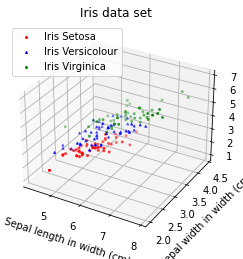

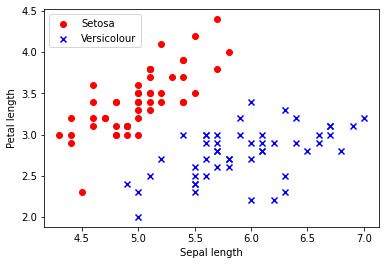

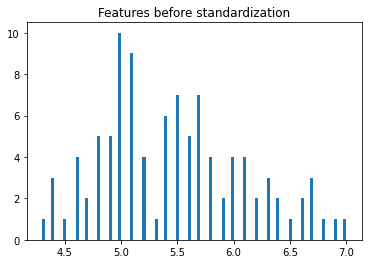

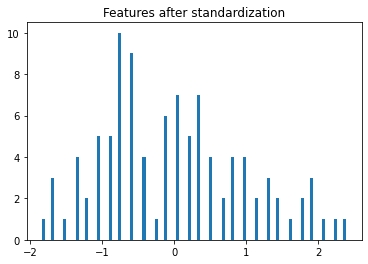

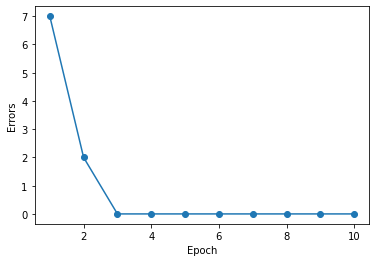

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


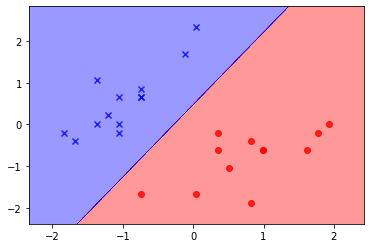

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

class Perceptron:

    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, n_iter=10):
        """
        fit the Perceptron model on the training data """
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            # counter of the errors during this training iteration
            errors = 0
            for xi, yi in zip(x, y):
                # for each sample compute the update value
                update = self.learning_rate * (yi - self.predict(xi))
                # and apply it to the y-intercept and weights array
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)

            self.misclassified_samples.append(errors)

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        return np.where(self.f(x) >= 0, 1, -1)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# download and convert the csv into a DataFrame
df = pd.read_csv(url, header=None)
df.head()

# extract the label column
y = df.iloc[:, 4].values
# extract features
x = df.iloc[:, 0:3].values

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_title('Iris data set')
ax.set_xlabel("Sepal length in width (cm)")
ax.set_ylabel("Sepal width in width (cm)")
ax.set_zlabel("Petal length in width (cm)")

# plot the samples
ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red',
           marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue',
           marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',
           marker='x', s=4, edgecolor='green', label="Iris Virginica")

plt.legend(loc='upper left')
plt.show()

x = x[0:100, 0:2]  # reduce the dimensionality of the data
y = y[0:100]

# plot Iris Setosa samples
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')
# plot Iris Versicolour samples
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x',
            label='Versicolour')

# show the legend
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')

# show the plot
plt.show()

from sklearn.model_selection import train_test_split

# map the labels to a binary integer value
y = np.where(y == 'Iris-setosa', 1, -1)

# standardization of the input features
plt.hist(x[:, 0], bins=100)
plt.title("Features before standardization")
plt.savefig("./before.png", dpi=300)
plt.show()

x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

plt.hist(x[:, 0], bins=100)
plt.title("Features after standardization")
plt.show()

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=0)

# train the model
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train)

# plot the number of errors during each iteration
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()


from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y):
    resolution = 0.001
    
    # define a set of markers
    markers = ('o', 'x')
    # define available colors
    cmap = ListedColormap(('red', 'blue'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # plot the decision region...
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=c1)
    plt.show()

plot_decision_regions(x_test, y_test)